# Matt Sloane / ms9548

## HW 7 - Plotting Exercise

In [64]:
# Import Modules

from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import json
import pylab as pl
import statsmodels.api as sm

if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")
    
s = json.load(open(os.getenv("PUIDATA")+'/fbb_matplotlibrc.json'))
pl.rcParams.update(s)   

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [81]:
# import data
os.getenv("PUIDATA")
edu_Data = pd.read_excel(os.getenv("PUIDATA") + "/edu_trump.xls")

# Convert Rank fields to numeric
edu_Data["Rank"] = pd.to_numeric(edu_Data["Rank"], errors="coerce")
edu_Data["Rank.1"] = pd.to_numeric(edu_Data["Rank.1"], errors="coerce")
edu_Data["Rank.2"] = pd.to_numeric(edu_Data["Rank.2"], errors="coerce")
edu_Data = edu_Data.dropna()
edu_Data




,State,HS_Grad_Rate,Rank,Undergrad_Grad_Rate,Rank.1,Advanced_Grad_Rate,Rank.2,Trump_Support
0,Alabama,0.821,46.0,0.220,44.0,0.077,40.0,0.48
1,Alaska,0.914,3.0,0.266,24.0,0.090,28.0,0.43
2,Arizona,0.842,37.0,0.256,29.0,0.093,26.0,0.42
3,Arkansas,0.824,44.0,0.189,49.0,0.061,50.0,0.56
4,California,0.806,48.0,0.299,14.0,0.107,15.0,0.28
5,Colorado,0.893,17.0,0.359,3.0,0.127,8.0,0.43
6,Connecticut,0.886,21.0,0.356,4.0,0.155,3.0,0.35
7,Delaware,0.874,26.0,0.287,18.0,0.114,11.0,0.30
9,Florida,0.853,33.0,0.253,31.0,0.090,28.0,0.45
10,Georgia,0.839,38.0,0.275,20.0,0.099,21.0,0.44


In [82]:
# OLS Regression Line Function

# Line / OLS Regression Functions

def fit_line1(x, y):
    """
    Fits a line to data properly adding the dimensions required by statsmodels arguments:
        x: series of independent variables
        y: seried of dependent variables
    Output:
        slope, intercept of best fit line, and the full model fit
    """
    X = sm.add_constant(x)
    model = sm.OLS(y, X, missing='drop') # ignores entires where x or y is NaN
    fit = model.fit()
    return fit.params[1], fit.params[0], fit # could also return stderr in each via fit.bse


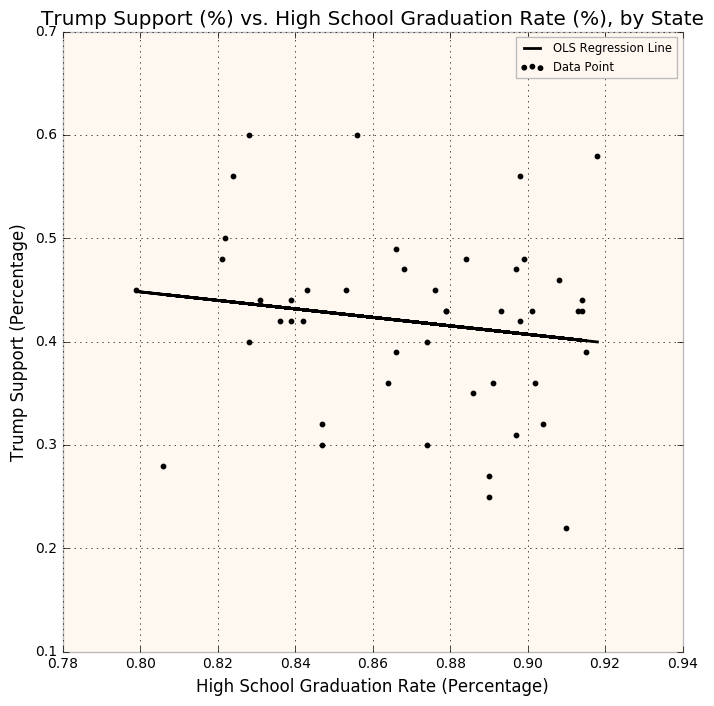

In [88]:
# plot data

y = edu_Data['Trump_Support']   # dependent variable
x1 = edu_Data['HS_Grad_Rate']   # independent variable

s, i , model = fit_line1(x1, y)

plt.figure(figsize=(8,8))
plt.xlabel('High School Graduation Rate (Percentage)')
plt.ylabel('Trump Support (Percentage)')
plt.title('Trump Support (%) vs. High School Graduation Rate (%), by State')
plt.scatter(x1, y, color='#000000', label = 'Data Point', marker = ".", s = 40)
pl.plot(x1, model.predict(), 'k', label = 'OLS Regression Line') # plot regression function results
plt.legend(loc = 'best', fontsize = 'small')

pl.show()






### The figure above plots the percentage of Donald Trump for President supporters by state (the dependent / y variable) versus the high school graduation rate by state (the independent / x variable).  The plot is an investigation into whether basic educational attainment levels within a state has influence on whether or not a state is more or less likely to support Donald Trump for president.  It is the author's underlying hypothesis that states with lower educational attainment results are more likely to support Trump.

#### Sources:  

#### (1) "Table 233. Educational Attainment by State". United States Census Bureau. 2011. Archived from the original on February 21, 2012. Retrieved 2014-05-23.

#### (2) https://en.wikipedia.org/wiki/Statewide_opinion_polling_for_the_United_States_presidential_election,_2016


In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Trump_Support   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.093
Date:                Sun, 30 Oct 2016   Prob (F-statistic):              0.301
Time:                        13:32:20   Log-Likelihood:                 48.766
No. Observations:                  47   AIC:                            -93.53
Df Residuals:                      45   BIC:                            -89.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const            0.7766      0.342      2.268      0.028         0.087     1.466
HS_Grad_Rate    -0.4108      0.393     -1.045      0.301        -1.202     0.381
==============================================================================
Omnibus:                        0.106   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.949   Jarque-Bera (JB):                0.065
Skew:                          -0.070   Prob(JB):                        0.968
Kurtosis:                       2.885   Cond. No.                         54.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""